In [1]:
# p230 
# 혼동행렬(TN,FP,FN,TP)을 핸들링을 잘해야 불균형데이터세트를 잘 만들 수 있음

In [2]:
import numpy as np
import pandas as pd

In [3]:
# 데이터 불러오기 , 정리하기
!ls Applied-Deep-Learning-with-Keras

Lesson01  Lesson03  Lesson05  Lesson07	Lesson09  README.md
Lesson02  Lesson04  Lesson06  Lesson08	LICENSE


In [4]:
!ls Applied-Deep-Learning-with-Keras/Lesson06/data

Flu.csv  Health_Data.csv


In [5]:
!head Applied-Deep-Learning-with-Keras/Lesson06/data/Health_Data.csv

Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
1,33,Urgent,Y,0,M,1,0,1,0
2,34,Emergency,N,0,M,1,0,22,0
3,88,Trauma,Y,1,M,1,1,100,1
4,56,Elective,Y,0,M,1,0,2,0
5,45,Trauma,Y,0,M,1,0,34,0
6,23,Elective,N,0,M,0,0,123,0
7,67,Elective,N,0,M,0,0,23,0
8,55,Elective,N,0,M,1,0,123,1
9,77,Trauma,N,0,F,1,0,44,0


In [6]:
patient_data = pd.read_csv(
 "Applied-Deep-Learning-with-Keras/" +
    "Lesson06/data/Health_Data.csv"
)

In [7]:
patient_data.head()

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
0,1,33,Urgent,Y,0,M,1,0,1,0
1,2,34,Emergency,N,0,M,1,0,22,0
2,3,88,Trauma,Y,1,M,1,1,100,1
3,4,56,Elective,Y,0,M,1,0,2,0
4,5,45,Trauma,Y,0,M,1,0,34,0


In [8]:
patient_data.describe()
# 357명의 환자, 40대가 많음, -환자는 60대가 많을 줄 알았는데 40대가 많다는 것
# 실질적인 데이터(평균)을 해치는 주요요소 : 이상치(outideal)
# 현실에는 이상치가 존재하기 때문에  -> 사분위수(평균의 여러값)가 있는 것 
# 평균 : 4가지가 있음, 중앙값, 빈도값(count로 대체)

# 0~ 14세가 25% / 14~ 35세 50% / 35~ 96세 75% -> 마케팅 타겟
# 75% 부터는 수술이 1번씩은 있음
# 50% 부터 흡연
# 나이 많아 질수록 병원체류 높아짐
# 재입원율은 낮지만 고령층 구간이 많음 

,Patient_id,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,Readmitted
count,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,179.00000,42.574230,0.341737,0.596639,0.378151,43.182073,0.193277
std,103.20126,29.274624,0.474957,0.491261,0.485606,47.362609,0.395423
min,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,90.00000,14.000000,0.000000,0.000000,0.000000,12.000000,0.000000
50%,179.00000,35.000000,0.000000,1.000000,0.000000,32.000000,0.000000
75%,268.00000,67.000000,1.000000,1.000000,1.000000,55.000000,0.000000
max,357.00000,96.000000,1.000000,1.000000,1.000000,352.000000,1.000000


In [9]:
# 위 데이터는 젠더는 나타나지 않음
# 또 다른 카테고리 데이터 보고 싶을 때
patient_data.describe(include=['object'])
# freq 빈도수

,Admission_type,PreExistingDisease,Gender
count,357,357,357
unique,5,2,2
top,Urgent,N,F
freq,131,228,186


In [10]:
#patient_data = pd.read_csv(

In [11]:
patient_data.head()

,Patient_id,Age,Admission_type,PreExistingDisease,PreviousSurgery,Gender,Smoker,Homeless,DaysinHospital,Readmitted
0,1,33,Urgent,Y,0,M,1,0,1,0
1,2,34,Emergency,N,0,M,1,0,22,0
2,3,88,Trauma,Y,1,M,1,1,100,1
3,4,56,Elective,Y,0,M,1,0,2,0
4,5,45,Trauma,Y,0,M,1,0,34,0


In [12]:
# 어드미션 추가
# dummies 카테고리화 할 수 있는 것을 변환하고 각각에 대한 빈도수 확인 가능

X= patient_data.iloc

print(X)

In [13]:
# 전체 데이터 중 1열 가져옴
# X= patient_data.iloc[:,1]
X= patient_data.iloc[:,1:9]

print(X)
# 이 데이터로 판정할 수 있는 것은 무엇일지 생각해보기 

     Age Admission_type PreExistingDisease  PreviousSurgery Gender  Smoker  \
0     33         Urgent                  Y                0      M       1   
1     34      Emergency                  N                0      M       1   
2     88         Trauma                  Y                1      M       1   
3     56       Elective                  Y                0      M       1   
4     45         Trauma                  Y                0      M       1   
..   ...            ...                ...              ...    ...     ...   
352   14         Trauma                  Y                1      M       1   
353   45         Trauma                  N                0      F       1   
354   67         Trauma                  N                1      M       1   
355   43         Trauma                  Y                1      M       0   
356    2         Trauma                  Y                1      F       0   

     Homeless  DaysinHospital  
0           0               1  

In [14]:
# 데이터 분리
y= patient_data.iloc[:,9]
print(y)
# 여덟개의 매개변수를 가지고 재입원(Readmitted)을 할지 안할지 판정
# -> 나이 많은 사람, 교통사고 당한사람

0      0
1      0
2      1
3      0
4      0
      ..
352    0
353    0
354    0
355    0
356    0
Name: Readmitted, Length: 357, dtype: int64


In [15]:
# 다시 데이터 뭐가 있는지 확인
# 어떤 데이터 있는 지 숫자 바꿔가면서 볼 수 있음
print(X.iloc[:, 2])

0      Y
1      N
2      Y
3      Y
4      Y
      ..
352    Y
353    N
354    N
355    Y
356    Y
Name: PreExistingDisease, Length: 357, dtype: object


In [16]:
# 데이터 분리 후 엔코딩 (Admission_type :1)
# 드롭할 것 정하기 
SpecType = pd.get_dummies(
    X.iloc[:,1],
    drop_first = True,
    prefix = 'SpecType'
)

In [17]:
# 전 구간이 분리 된 것을 확인할 수 있음
# Elective 급하지 않은 사람은 사라짐
# [357 rows x 4 columns]-> 4개의 열
print(SpecType)

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent
0                     0                 0                0                1
1                     1                 0                0                0
2                     0                 0                1                0
3                     0                 0                0                0
4                     0                 0                1                0
..                  ...               ...              ...              ...
352                   0                 0                1                0
353                   0                 0                1                0
354                   0                 0                1                0
355                   0                 0                1                0
356                   0                 0                1                0

[357 rows x 4 columns]


In [18]:
# 질병여부 엔코딩(PreExistingDisease:2번쨰)
preDie = pd.get_dummies(
    X.iloc[:,2],
    drop_first = True,
    prefix = 'PreDie'
)

In [19]:
print(preDie)

     PreDie_Y
0           1
1           0
2           1
3           1
4           1
..        ...
352         1
353         0
354         0
355         1
356         1

[357 rows x 1 columns]


In [20]:
# 위에서 엔코딩 한 것들, 성별에 대한것은 쓸모 없을 것 같아 지우기
# [357 rows x 5 columns] -> drop해서 5열로 바뀐 것 볼 수 있음
X.drop(
    [
        'Admission_type',
        'PreExistingDisease',
        'Gender'
        ],
        axis = 1,
        inplace = True
)  
print(X)

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital
0     33                0       1         0               1
1     34                0       1         0              22
2     88                1       1         1             100
3     56                0       1         0               2
4     45                0       1         0              34
..   ...              ...     ...       ...             ...
352   14                1       1         1               2
353   45                0       1         1               2
354   67                1       1         1               2
355   43                1       0         1               2
356    2                1       0         1               2

[357 rows x 5 columns]


In [21]:
# 다 합치기 
X = pd.concat(
    [X, SpecType, preDie], axis = 1,
)

In [22]:
print(X)

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital  \
0     33                0       1         0               1   
1     34                0       1         0              22   
2     88                1       1         1             100   
3     56                0       1         0               2   
4     45                0       1         0              34   
..   ...              ...     ...       ...             ...   
352   14                1       1         1               2   
353   45                0       1         1               2   
354   67                1       1         1               2   
355   43                1       0         1               2   
356    2                1       0         1               2   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
0                     0                 0                0                1   
1                     1                 0                0                0   
2     

In [23]:
# ~ p237 ~ p241 9번까지

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1
)

In [26]:
print(X_test.shape)
print(y_test.shape)
# train test 분리 완료

(108, 10)
(108,)


In [27]:
print(108 / 357)
print(249 / 357)
# 이거에 맞춰서 test_size를 계산해줌

0.3025210084033613
0.6974789915966386


In [28]:
# 정규화
from sklearn.preprocessing import StandardScaler

In [29]:
print(X_train)

     Age  PreviousSurgery  Smoker  Homeless  DaysinHospital  \
62    23                1       1         0              56   
154    6                0       1         1              77   
185   44                0       0         0              74   
102   88                0       1         1               3   
207   91                0       1         1              99   
..   ...              ...     ...       ...             ...   
203   91                1       1         0              96   
255   35                1       1         1              25   
72    48                0       0         0              14   
235   91                0       1         1             123   
37    77                0       1         0              44   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
62                    0                 0                1                0   
154                   0                 0                0                1   
185   

In [30]:
# 스케일러 사용해서 인코딩된 데이터를 가우시안 분포에 나오는 확률분포데이터로 바뀜(=확률로 계산할 수 있게함)
# 인코딩된 데이터를 확률로 계산할 수 있도록 스케일러를 통해 정규분포에서 사용할 수 있는 형태로 바뀜
# 정규분포 테이블 구글검색
# Z = 평균과 표준편차 달라서 확인하기 힘듦 -> z-score로 가능 -> fit_score가 이베이스 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
print(X_train)

[[-0.63137586  1.30633906  0.85391256 ...  1.94639707 -0.78541907
  -0.75891328]
 [-1.20477514 -0.76549805  0.85391256 ... -0.51376978  1.27320565
  -0.75891328]
 [ 0.07694089 -0.76549805 -1.17108009 ... -0.51376978 -0.78541907
  -0.75891328]
 ...
 [ 0.21185837 -0.76549805 -1.17108009 ... -0.51376978 -0.78541907
  -0.75891328]
 [ 1.66222125 -0.76549805  0.85391256 ... -0.51376978  1.27320565
   1.31767361]
 [ 1.19001008 -0.76549805  0.85391256 ... -0.51376978  1.27320565
  -0.75891328]]


In [31]:
X_train = pd.DataFrame(
    X_train, columns = X_test.columns
)

print(X_train)

          Age  PreviousSurgery    Smoker  Homeless  DaysinHospital  \
0   -0.631376         1.306339  0.853913 -0.745822        0.288742   
1   -1.204775        -0.765498  0.853913  1.340803        0.739842   
2    0.076941        -0.765498 -1.171080 -0.745822        0.675399   
3    1.561033        -0.765498  0.853913  1.340803       -0.849748   
4    1.662221        -0.765498  0.853913  1.340803        1.212423   
..        ...              ...       ...       ...             ...   
244  1.662221         1.306339  0.853913 -0.745822        1.147980   
245 -0.226623         1.306339  0.853913  1.340803       -0.377168   
246  0.211858        -0.765498 -1.171080 -0.745822       -0.613458   
247  1.662221        -0.765498  0.853913  1.340803        1.727966   
248  1.190010        -0.765498  0.853913 -0.745822        0.030971   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
0             -0.341456         -0.295527         1.946397        -0.785419   
1

In [32]:
X_train = pd.DataFrame(
    X_train, columns = X_test.columns
)

print(X_train)

          Age  PreviousSurgery    Smoker  Homeless  DaysinHospital  \
0   -0.631376         1.306339  0.853913 -0.745822        0.288742   
1   -1.204775        -0.765498  0.853913  1.340803        0.739842   
2    0.076941        -0.765498 -1.171080 -0.745822        0.675399   
3    1.561033        -0.765498  0.853913  1.340803       -0.849748   
4    1.662221        -0.765498  0.853913  1.340803        1.212423   
..        ...              ...       ...       ...             ...   
244  1.662221         1.306339  0.853913 -0.745822        1.147980   
245 -0.226623         1.306339  0.853913  1.340803       -0.377168   
246  0.211858        -0.765498 -1.171080 -0.745822       -0.613458   
247  1.662221        -0.765498  0.853913  1.340803        1.727966   
248  1.190010        -0.765498  0.853913 -0.745822        0.030971   

     SpecType_Emergency  SpecType_Newborn  SpecType_Trauma  SpecType_Urgent  \
0             -0.341456         -0.295527         1.946397        -0.785419   
1

In [33]:
X_train.head()

,Age,PreviousSurgery,Smoker,Homeless,DaysinHospital,SpecType_Emergency,SpecType_Newborn,SpecType_Trauma,SpecType_Urgent,PreDie_Y
0,-0.631376,1.306339,0.853913,-0.745822,0.288742,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
1,-1.204775,-0.765498,0.853913,1.340803,0.739842,-0.341456,-0.295527,-0.513770,1.273206,-0.758913
2,0.076941,-0.765498,-1.171080,-0.745822,0.675399,2.928638,-0.295527,-0.513770,-0.785419,-0.758913
3,1.561033,-0.765498,0.853913,1.340803,-0.849748,-0.341456,-0.295527,1.946397,-0.785419,-0.758913
4,1.662221,-0.765498,0.853913,1.340803,1.212423,-0.341456,-0.295527,1.946397,-0.785419,1.317674


In [34]:
X_test = sc.transform(X_test)
X_test = pd.DataFrame(
    X_test, columns = X_train.columns
)

In [35]:
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

In [36]:
print(type(X_train_np))

<class 'numpy.ndarray'>


In [37]:
print(X_train_np.shape)

(249, 10)


In [38]:
print(type(X_train))
# 데이터가 10만개 이하에서는 numpy가 느린데, 이상은 빠름
# numpy 는 c로 만들어짐, 수치연산이라서 빠름

<class 'pandas.core.frame.DataFrame'>


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [40]:
model = Sequential()

In [41]:
model.add(
    Dense(
        units = 6, activation = 'relu',
        kernel_initializer = 'uniform',
        input_dim = 10
    )
)
model.add(Dropout(rate = 0.3))

In [42]:
model.add(
    Dense(
        units = 6, activation = 'relu',
        kernel_initializer = 'uniform',
    )
)
model.add(Dropout(rate = 0.3))

In [43]:
model.add(
    Dense(
        units = 12, activation = 'tanh',
        kernel_initializer = 'uniform',
    )
)
model.add(Dropout(rate = 0.3))

In [44]:
model.add(
    Dense(
        units = 6, activation = 'tanh',
        kernel_initializer = 'uniform',
    )
)
model.add(Dropout(rate = 0.3))

In [45]:
model.add(
    Dense(
        units = 1, activation = 'sigmoid',
        kernel_initializer = 'uniform'
    )
)

In [46]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [47]:
model.fit(
    X_train_np, y_train_np, 
    epochs = 400, 
    # 계산할 때 몇개 단위로 계산할 것인가
    batch_size = 20
)
# 정보를 20개 가져가서 계산하고 가중치 출력
# 진동하는 경우 -> 하이퍼블릭 탄젠트 쓰기 -> 정확성이 더 올리감

Epoch 1/400
13/13 [==============================] - 0s 718us/step - loss: 0.6911 - accuracy: 0.7791
Epoch 2/400
13/13 [==============================] - 0s 732us/step - loss: 0.6860 - accuracy: 0.8072
Epoch 3/400
13/13 [==============================] - 0s 730us/step - loss: 0.6798 - accuracy: 0.8072
Epoch 4/400
13/13 [==============================] - 0s 561us/step - loss: 0.6701 - accuracy: 0.8072
Epoch 5/400
13/13 [==============================] - 0s 691us/step - loss: 0.6577 - accuracy: 0.8072
Epoch 6/400
13/13 [==============================] - 0s 959us/step - loss: 0.6410 - accuracy: 0.8072
Epoch 7/400
13/13 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.8072
Epoch 8/400
13/13 [==============================] - 0s 653us/step - loss: 0.5932 - accuracy: 0.8072
Epoch 9/400
13/13 [==============================] - 0s 705us/step - loss: 0.5655 - accuracy: 0.8072
Epoch 10/400
13/13 [==============================] - 0s 694us/step - loss: 0.5358 - accuracy

13/13 [==============================] - 0s 597us/step - loss: 0.2834 - accuracy: 0.8916
Epoch 82/400
13/13 [==============================] - 0s 611us/step - loss: 0.2640 - accuracy: 0.9157
Epoch 83/400
13/13 [==============================] - 0s 622us/step - loss: 0.2758 - accuracy: 0.9116
Epoch 84/400
13/13 [==============================] - 0s 661us/step - loss: 0.2682 - accuracy: 0.9237
Epoch 85/400
13/13 [==============================] - 0s 668us/step - loss: 0.2914 - accuracy: 0.9157
Epoch 86/400
13/13 [==============================] - 0s 598us/step - loss: 0.2923 - accuracy: 0.9076
Epoch 87/400
13/13 [==============================] - 0s 671us/step - loss: 0.2738 - accuracy: 0.9197
Epoch 88/400
13/13 [==============================] - 0s 713us/step - loss: 0.2784 - accuracy: 0.9157
Epoch 89/400
13/13 [==============================] - 0s 613us/step - loss: 0.2954 - accuracy: 0.9076
Epoch 90/400
13/13 [==============================] - 0s 669us/step - loss: 0.2957 - accuracy: 

13/13 [==============================] - 0s 613us/step - loss: 0.3226 - accuracy: 0.8956
Epoch 161/400
13/13 [==============================] - 0s 604us/step - loss: 0.2687 - accuracy: 0.9116
Epoch 162/400
13/13 [==============================] - 0s 652us/step - loss: 0.2544 - accuracy: 0.9116
Epoch 163/400
13/13 [==============================] - 0s 590us/step - loss: 0.2783 - accuracy: 0.9076
Epoch 164/400
13/13 [==============================] - 0s 608us/step - loss: 0.2851 - accuracy: 0.9197
Epoch 165/400
13/13 [==============================] - 0s 708us/step - loss: 0.2903 - accuracy: 0.8996
Epoch 166/400
13/13 [==============================] - 0s 646us/step - loss: 0.2445 - accuracy: 0.9237
Epoch 167/400
13/13 [==============================] - 0s 600us/step - loss: 0.2937 - accuracy: 0.9076
Epoch 168/400
13/13 [==============================] - 0s 660us/step - loss: 0.2608 - accuracy: 0.9237
Epoch 169/400
13/13 [==============================] - 0s 611us/step - loss: 0.2458 - a

13/13 [==============================] - 0s 728us/step - loss: 0.2630 - accuracy: 0.9197
Epoch 239/400
13/13 [==============================] - 0s 679us/step - loss: 0.2256 - accuracy: 0.9237
Epoch 240/400
13/13 [==============================] - 0s 769us/step - loss: 0.2231 - accuracy: 0.9237
Epoch 241/400
13/13 [==============================] - 0s 694us/step - loss: 0.2530 - accuracy: 0.9116
Epoch 242/400
13/13 [==============================] - 0s 716us/step - loss: 0.2470 - accuracy: 0.9116
Epoch 243/400
13/13 [==============================] - 0s 824us/step - loss: 0.2661 - accuracy: 0.9157
Epoch 244/400
13/13 [==============================] - 0s 719us/step - loss: 0.2209 - accuracy: 0.9197
Epoch 245/400
13/13 [==============================] - 0s 624us/step - loss: 0.2494 - accuracy: 0.9157
Epoch 246/400
13/13 [==============================] - 0s 704us/step - loss: 0.2383 - accuracy: 0.9277
Epoch 247/400
13/13 [==============================] - 0s 688us/step - loss: 0.2399 - a

13/13 [==============================] - 0s 598us/step - loss: 0.2811 - accuracy: 0.9036
Epoch 318/400
13/13 [==============================] - 0s 563us/step - loss: 0.2523 - accuracy: 0.9197
Epoch 319/400
13/13 [==============================] - 0s 599us/step - loss: 0.2358 - accuracy: 0.9197
Epoch 320/400
13/13 [==============================] - 0s 568us/step - loss: 0.2370 - accuracy: 0.9116
Epoch 321/400
13/13 [==============================] - 0s 646us/step - loss: 0.2225 - accuracy: 0.9277
Epoch 322/400
13/13 [==============================] - 0s 602us/step - loss: 0.2354 - accuracy: 0.9237
Epoch 323/400
13/13 [==============================] - 0s 599us/step - loss: 0.2787 - accuracy: 0.9116
Epoch 324/400
13/13 [==============================] - 0s 651us/step - loss: 0.2268 - accuracy: 0.9317
Epoch 325/400
13/13 [==============================] - 0s 619us/step - loss: 0.2341 - accuracy: 0.9197
Epoch 326/400
13/13 [==============================] - 0s 643us/step - loss: 0.2263 - a

13/13 [==============================] - 0s 633us/step - loss: 0.2450 - accuracy: 0.9197
Epoch 397/400
13/13 [==============================] - 0s 634us/step - loss: 0.2326 - accuracy: 0.9197
Epoch 398/400
13/13 [==============================] - 0s 643us/step - loss: 0.2307 - accuracy: 0.9197
Epoch 399/400
13/13 [==============================] - 0s 653us/step - loss: 0.2460 - accuracy: 0.9157
Epoch 400/400
13/13 [==============================] - 0s 694us/step - loss: 0.2334 - accuracy: 0.9237


In [48]:
y_pred_class = model.predict(X_test_np)
y_pred_prob = model.predict_proba(X_test_np)
# predict가 정규화를 다 해줌
# proba는 곧 사라진다고 함 ㅋㅋ

Instructions for updating:
Please use `model.predict()` instead.


In [49]:
print(y_pred_class)

[[0.09181985]
 [0.92470413]
 [0.01398602]
 [0.01611689]
 [0.92470443]
 [0.01400179]
 [0.9247044 ]
 [0.01431984]
 [0.01456374]
 [0.01406032]
 [0.0184035 ]
 [0.11529267]
 [0.01412925]
 [0.08851355]
 [0.01397899]
 [0.29823008]
 [0.01398033]
 [0.01398844]
 [0.03263339]
 [0.01398155]
 [0.12574336]
 [0.01400048]
 [0.01857755]
 [0.29823008]
 [0.01468256]
 [0.29823008]
 [0.0141862 ]
 [0.9246166 ]
 [0.01397401]
 [0.0140025 ]
 [0.01418969]
 [0.03421727]
 [0.01402113]
 [0.02513859]
 [0.01873747]
 [0.02550957]
 [0.29823008]
 [0.08421069]
 [0.01469308]
 [0.9246867 ]
 [0.01397601]
 [0.01404008]
 [0.01437649]
 [0.10236457]
 [0.01408607]
 [0.014079  ]
 [0.0199829 ]
 [0.04566586]
 [0.9247037 ]
 [0.01432368]
 [0.01406083]
 [0.29823008]
 [0.8588048 ]
 [0.01403052]
 [0.01397547]
 [0.9247043 ]
 [0.01458681]
 [0.0142248 ]
 [0.01397562]
 [0.01736081]
 [0.02819452]
 [0.9122369 ]
 [0.01407599]
 [0.01418105]
 [0.11529267]
 [0.01889938]
 [0.01626444]
 [0.29823008]
 [0.01522446]
 [0.01397574]
 [0.900363  ]
 [0.29

In [50]:
print(y_pred_prob)

[[0.09181985]
 [0.92470413]
 [0.01398602]
 [0.01611689]
 [0.92470443]
 [0.01400179]
 [0.9247044 ]
 [0.01431984]
 [0.01456374]
 [0.01406032]
 [0.0184035 ]
 [0.11529267]
 [0.01412925]
 [0.08851355]
 [0.01397899]
 [0.29823008]
 [0.01398033]
 [0.01398844]
 [0.03263339]
 [0.01398155]
 [0.12574336]
 [0.01400048]
 [0.01857755]
 [0.29823008]
 [0.01468256]
 [0.29823008]
 [0.0141862 ]
 [0.9246166 ]
 [0.01397401]
 [0.0140025 ]
 [0.01418969]
 [0.03421727]
 [0.01402113]
 [0.02513859]
 [0.01873747]
 [0.02550957]
 [0.29823008]
 [0.08421069]
 [0.01469308]
 [0.9246867 ]
 [0.01397601]
 [0.01404008]
 [0.01437649]
 [0.10236457]
 [0.01408607]
 [0.014079  ]
 [0.0199829 ]
 [0.04566586]
 [0.9247037 ]
 [0.01432368]
 [0.01406083]
 [0.29823008]
 [0.8588048 ]
 [0.01403052]
 [0.01397547]
 [0.9247043 ]
 [0.01458681]
 [0.0142248 ]
 [0.01397562]
 [0.01736081]
 [0.02819452]
 [0.9122369 ]
 [0.01407599]
 [0.01418105]
 [0.11529267]
 [0.01889938]
 [0.01626444]
 [0.29823008]
 [0.01522446]
 [0.01397574]
 [0.900363  ]
 [0.29

In [51]:
y_pred_class[:5]

array([[0.09181985],
       [0.92470413],
       [0.01398602],
       [0.01611689],
       [0.92470443]], dtype=float32)

In [52]:
y_pred_class = y_pred_class > 0.5

print(y_pred_class)
# 재입원 고객 관리에 대한 결과값

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [53]:
print(y_pred_class.astype(int)[:5])
# 0과 1의 값

[[0]
 [1]
 [0]
 [0]
 [1]]


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
res = accuracy_score(y_test_np, y_pred_class)

print(res)

0.8611111111111112


In [56]:
# 정확성을 계산해보자!
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_class)

0.8611111111111112

In [57]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [58]:
y_test.value_counts()

0    87
1    21
Name: Readmitted, dtype: int64

In [59]:
print(87 / 108)
print(21 / 108)

0.8055555555555556
0.19444444444444445


In [60]:
# 젠더값 넣은 교재가 더 정확성이 높지만 과연 충분할까?
# 정확성 값을 널 정확성과 비교해보자!

In [61]:
y_test.value_counts().head(1) / len(y_test)

0    0.805556
Name: Readmitted, dtype: float64

In [62]:
# 현업 Nvidianet, goolenet, 욜로

In [63]:
# p232
# p236 -> 프로젝트 AUC점수와 모델 품질이 관계그림 6.9

In [64]:
# p251 ROC와 AUC점수 계산 
from sklearn.metrics import roc_curve

In [65]:
# fpr(거짓 양성률): 실제로는 해당사항이 없지만
#                 해당 사항이 있다고 판정을 내리는 경우
fpr, tpr, thresholds = roc_curve(
    y_test, y_pred_prob
)

In [66]:
print(fpr)

[0.         0.01149425 0.01149425 0.02298851 0.02298851 0.03448276
 0.03448276 0.04597701 0.04597701 0.05747126 0.05747126 0.17241379
 0.18390805 0.20689655 0.28735632 0.28735632 0.33333333 0.33333333
 0.4137931  0.4137931  0.43678161 0.43678161 0.66666667 0.66666667
 0.89655172 0.89655172 1.        ]


In [67]:
print(tpr)
# 시작하자마자 안좋음

[0.         0.04761905 0.0952381  0.0952381  0.33333333 0.33333333
 0.38095238 0.38095238 0.42857143 0.42857143 0.52380952 0.66666667
 0.66666667 0.66666667 0.66666667 0.71428571 0.71428571 0.76190476
 0.76190476 0.80952381 0.80952381 0.85714286 0.85714286 0.95238095
 0.95238095 1.         1.        ]


In [68]:
print(thresholds)

[1.9247044  0.92470443 0.9247044  0.9247043  0.92467004 0.92463326
 0.9246166  0.9241792  0.9240596  0.9122369  0.8588048  0.29823008
 0.12574336 0.11529267 0.08246014 0.04566586 0.02845776 0.02819452
 0.01873747 0.01857755 0.01765743 0.0176056  0.01412925 0.014079
 0.01397899 0.01397863 0.01397394]


In [69]:
import matplotlib.pyplot as plt


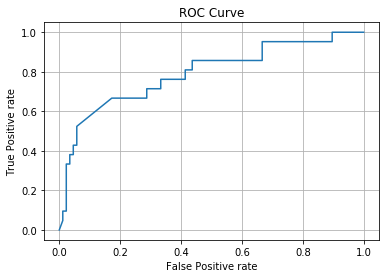

In [70]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.grid(True)
plt.show()

In [71]:
def optimum_threshold(my_threshold):
    print(
        "Sensitivity:", 
        tpr[thresholds > my_threshold][-1]
    )
    print(
        "Specificity:", 
        1 - fpr[thresholds > my_threshold][-1]
    )
    # threshold 임계치 my threshold

In [72]:
print(tpr[thresholds > 0.5])

[0.         0.04761905 0.0952381  0.0952381  0.33333333 0.33333333
 0.38095238 0.38095238 0.42857143 0.42857143 0.52380952]


In [73]:
print(tpr[thresholds > 0.5][-1])
# -1 : 배열을 거꾸로 순회할 수 있음

0.5238095238095238


In [74]:
optimum_threshold(0.3)

Sensitivity: 0.5238095238095238
Specificity: 0.9425287356321839


In [75]:
optimum_threshold(0.5)

Sensitivity: 0.5238095238095238
Specificity: 0.9425287356321839


In [76]:
print(tpr[thresholds > 0.6])

[0.         0.04761905 0.0952381  0.0952381  0.33333333 0.33333333
 0.38095238 0.38095238 0.42857143 0.42857143 0.52380952]


In [77]:
print(tpr[thresholds > 0.5])

[0.         0.04761905 0.0952381  0.0952381  0.33333333 0.33333333
 0.38095238 0.38095238 0.42857143 0.42857143 0.52380952]


In [78]:
optimum_threshold(0.01)
# 정확성 : 참인 케이스 잘잡는지
# 특이성 : 거짓인 케이스 잘잡는지

Sensitivity: 1.0
Specificity: 0.0


In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc_auc_score(y_test, y_pred_prob)

0.7917350848385332

In [81]:
#optimum_threshold(0.5)
# 참이 되는 것이 얼마나 정확하냐
# 실제가 0 실제가 아닌경우 아니라고 할 확률
# 임계치를 높이니 둘 다 높아짐
# 0.5를 써야함 왜~~~~~~~??????
# 안정성을 추구한다면 둘 다 애매한 것 보다 하나라도 정확한 것이 중요
# 아닌걸 아니라고 판정하는게 0.5가 너무 높음 - 100중 2명틀림
# 0.3은 100중 16명이 틀림 
# 잘못된걸 잘못되었다고 말하는 것이 더 좋음

In [82]:
# Google TPU vs MS FPGA

In [83]:
# GPU도 FPGA로 만듦
# 유일하게 소프트웨어(프로그래밍)가 하드웨어 동작을 바꿀 수 있게 함 -> 빠름
# 그래픽카드 히든레이어 할 때마다 메모리 복사 -> 매우느림
# p261
# 메모리 복사를 안하게 이미지 복사를 하면 됨 
# 실시간 영상처리 유튜브 FPGA yolo
# FPGA랑 웹 연결 자이닉스 징크파는 곳
# p258
# 넷플릭스 테크블로그 